# Create Featues

In [1]:
import pandas as pd
import numpy as np

so_survey_df = (
    pd
    .read_csv('../input/stack-overflow-2018-developer-survey/survey_results_public.csv', 
              usecols=['FormalEducation', 'ConvertedSalary', 'Hobby', 
              'Country', 'StackOverflowJobsRecommend', 'VersionControl', 'Age', 
              'YearsCodingProf','Gender', 'Salary'])
    .rename(columns={'Salary':'RawSalary', 'YearsCodingProf':'Years Experience'})
)
so_survey_df['year'] = 2018
so_survey_df['month'] = np.random.default_rng(0).integers(1,12, so_survey_df.shape[0])
so_survey_df['day'] = np.random.default_rng(0).integers(2,28, so_survey_df.shape[0])

so_survey_df['SurveyDate'] = pd.to_datetime(so_survey_df[['year', 'month', 'day']])

/opt/conda/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3170: DtypeWarning: Columns (52,77,107,120,124) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [2]:
so_survey_df.select_dtypes(include=['int64', 'float64'])

,ConvertedSalary,year,month,day
0,NaN,2018,10,24
1,70841.0,2018,8,18
2,NaN,2018,6,15
3,NaN,2018,3,9
4,21426.0,2018,4,10
...,...,...,...,...
98850,NaN,2018,2,5
98851,NaN,2018,8,20
98852,NaN,2018,5,12
98853,NaN,2018,7,17


## Categorical Encoding  
- Ordinal Encoder : create interger range from 1,2, .. n to represent each categorical value.  
- One-Hot Encoder : expand featues with encode 1 to flag if in those category / 0 if not in those categories.  
- Dummpy Encoder : much like One-Hot, but will have 1 less features of columns 

In [3]:
# One-Hot
pd.get_dummies(so_survey_df, columns=['Country'], prefix='OH')

,Hobby,FormalEducation,Years Experience,RawSalary,ConvertedSalary,VersionControl,StackOverflowJobsRecommend,Gender,Age,year,...,OH_United Kingdom,OH_United Republic of Tanzania,OH_United States,OH_Uruguay,OH_Uzbekistan,"OH_Venezuela, Bolivarian Republic of...",OH_Viet Nam,OH_Yemen,OH_Zambia,OH_Zimbabwe
0,Yes,"Bachelor’s degree (BA, BS, B.Eng., etc.)",3-5 years,NaN,NaN,Git,NaN,Male,25 - 34 years old,2018,...,0,0,0,0,0,0,0,0,0,0
1,Yes,"Bachelor’s degree (BA, BS, B.Eng., etc.)",18-20 years,51000,70841.0,Git;Subversion,7,Male,35 - 44 years old,2018,...,1,0,0,0,0,0,0,0,0,0
2,Yes,Associate degree,6-8 years,NaN,NaN,NaN,NaN,NaN,NaN,2018,...,0,0,1,0,0,0,0,0,0,0
3,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)",12-14 years,NaN,NaN,Git,8,Male,35 - 44 years old,2018,...,0,0,1,0,0,0,0,0,0,0
4,Yes,Some college/university study without earning ...,0-2 years,260000,21426.0,Zip file back-ups,NaN,Male,18 - 24 years old,2018,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98850,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018,...,0,0,1,0,0,0,0,0,0,0
98851,No,NaN,0-2 years,NaN,NaN,NaN,NaN,NaN,NaN,2018,...,0,0,0,0,0,0,0,0,0,0
98852,Yes,"Bachelor’s degree (BA, BS, B.Eng., etc.)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018,...,0,0,0,0,0,0,0,0,0,0
98853,Yes,Some college/university study without earning ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018,...,0,0,0,0,0,0,0,0,0,0


In [4]:
pd.get_dummies(so_survey_df, columns=['Country'], prefix='DM', drop_first=True)

,Hobby,FormalEducation,Years Experience,RawSalary,ConvertedSalary,VersionControl,StackOverflowJobsRecommend,Gender,Age,year,...,DM_United Kingdom,DM_United Republic of Tanzania,DM_United States,DM_Uruguay,DM_Uzbekistan,"DM_Venezuela, Bolivarian Republic of...",DM_Viet Nam,DM_Yemen,DM_Zambia,DM_Zimbabwe
0,Yes,"Bachelor’s degree (BA, BS, B.Eng., etc.)",3-5 years,NaN,NaN,Git,NaN,Male,25 - 34 years old,2018,...,0,0,0,0,0,0,0,0,0,0
1,Yes,"Bachelor’s degree (BA, BS, B.Eng., etc.)",18-20 years,51000,70841.0,Git;Subversion,7,Male,35 - 44 years old,2018,...,1,0,0,0,0,0,0,0,0,0
2,Yes,Associate degree,6-8 years,NaN,NaN,NaN,NaN,NaN,NaN,2018,...,0,0,1,0,0,0,0,0,0,0
3,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)",12-14 years,NaN,NaN,Git,8,Male,35 - 44 years old,2018,...,0,0,1,0,0,0,0,0,0,0
4,Yes,Some college/university study without earning ...,0-2 years,260000,21426.0,Zip file back-ups,NaN,Male,18 - 24 years old,2018,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98850,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018,...,0,0,1,0,0,0,0,0,0,0
98851,No,NaN,0-2 years,NaN,NaN,NaN,NaN,NaN,NaN,2018,...,0,0,0,0,0,0,0,0,0,0
98852,Yes,"Bachelor’s degree (BA, BS, B.Eng., etc.)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018,...,0,0,0,0,0,0,0,0,0,0
98853,Yes,Some college/university study without earning ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018,...,0,0,0,0,0,0,0,0,0,0


## Less rank category

In [5]:
countries = so_survey_df['Country']
countries_count = countries.value_counts()
mask = countries.isin(countries_count[countries_count < 10].index)
print(so_survey_df[~mask]['Country'].value_counts())

United States     20309
India             13721
Germany            6459
United Kingdom     6221
Canada             3393
                  ...  
Senegal              13
Angola               11
Maldives             10
Somalia              10
Benin                10
Name: Country, Length: 132, dtype: int64


In [6]:
# Setting
so_survey_df['Paid_Job'] = 0
so_survey_df.loc[so_survey_df['ConvertedSalary']>0, 'Paid_Job'] = 1

# Assign with np.where
so_survey_df.assign(Paid_Job = lambda x : np.where(x['ConvertedSalary'] > 0, 1, 0))

,Hobby,Country,FormalEducation,Years Experience,RawSalary,ConvertedSalary,VersionControl,StackOverflowJobsRecommend,Gender,Age,year,month,day,SurveyDate,Paid_Job
0,Yes,Kenya,"Bachelor’s degree (BA, BS, B.Eng., etc.)",3-5 years,NaN,NaN,Git,NaN,Male,25 - 34 years old,2018,10,24,2018-10-24,0
1,Yes,United Kingdom,"Bachelor’s degree (BA, BS, B.Eng., etc.)",18-20 years,51000,70841.0,Git;Subversion,7,Male,35 - 44 years old,2018,8,18,2018-08-18,1
2,Yes,United States,Associate degree,6-8 years,NaN,NaN,NaN,NaN,NaN,NaN,2018,6,15,2018-06-15,0
3,No,United States,"Bachelor’s degree (BA, BS, B.Eng., etc.)",12-14 years,NaN,NaN,Git,8,Male,35 - 44 years old,2018,3,9,2018-03-09,0
4,Yes,South Africa,Some college/university study without earning ...,0-2 years,260000,21426.0,Zip file back-ups,NaN,Male,18 - 24 years old,2018,4,10,2018-04-10,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98850,Yes,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018,2,5,2018-02-05,0
98851,No,Spain,NaN,0-2 years,NaN,NaN,NaN,NaN,NaN,NaN,2018,8,20,2018-08-20,0
98852,Yes,India,"Bachelor’s degree (BA, BS, B.Eng., etc.)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018,5,12,2018-05-12,0
98853,Yes,Russian Federation,Some college/university study without earning ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018,7,17,2018-07-17,0


In [7]:
so_survey_df.assign(salary_binned = pd.cut(so_survey_df['ConvertedSalary'], 5))

,Hobby,Country,FormalEducation,Years Experience,RawSalary,ConvertedSalary,VersionControl,StackOverflowJobsRecommend,Gender,Age,year,month,day,SurveyDate,Paid_Job,salary_binned
0,Yes,Kenya,"Bachelor’s degree (BA, BS, B.Eng., etc.)",3-5 years,NaN,NaN,Git,NaN,Male,25 - 34 years old,2018,10,24,2018-10-24,0,NaN
1,Yes,United Kingdom,"Bachelor’s degree (BA, BS, B.Eng., etc.)",18-20 years,51000,70841.0,Git;Subversion,7,Male,35 - 44 years old,2018,8,18,2018-08-18,1,"(-2000.0, 400000.0]"
2,Yes,United States,Associate degree,6-8 years,NaN,NaN,NaN,NaN,NaN,NaN,2018,6,15,2018-06-15,0,NaN
3,No,United States,"Bachelor’s degree (BA, BS, B.Eng., etc.)",12-14 years,NaN,NaN,Git,8,Male,35 - 44 years old,2018,3,9,2018-03-09,0,NaN
4,Yes,South Africa,Some college/university study without earning ...,0-2 years,260000,21426.0,Zip file back-ups,NaN,Male,18 - 24 years old,2018,4,10,2018-04-10,1,"(-2000.0, 400000.0]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98850,Yes,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018,2,5,2018-02-05,0,NaN
98851,No,Spain,NaN,0-2 years,NaN,NaN,NaN,NaN,NaN,NaN,2018,8,20,2018-08-20,0,NaN
98852,Yes,India,"Bachelor’s degree (BA, BS, B.Eng., etc.)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018,5,12,2018-05-12,0,NaN
98853,Yes,Russian Federation,Some college/university study without earning ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018,7,17,2018-07-17,0,NaN


In [8]:
bins = [-np.inf, 10000, 50000, 100000, 150000, np.inf]

# Bin labels
labels = ['Very low', 'Low', 'Medium', 'High', 'Very high']

# Bin the continuous variable ConvertedSalary using these boundaries
so_survey_df.assign(boundary_binned = pd.cut(so_survey_df['ConvertedSalary'], bins, labels))


,Hobby,Country,FormalEducation,Years Experience,RawSalary,ConvertedSalary,VersionControl,StackOverflowJobsRecommend,Gender,Age,year,month,day,SurveyDate,Paid_Job,boundary_binned
0,Yes,Kenya,"Bachelor’s degree (BA, BS, B.Eng., etc.)",3-5 years,NaN,NaN,Git,NaN,Male,25 - 34 years old,2018,10,24,2018-10-24,0,NaN
1,Yes,United Kingdom,"Bachelor’s degree (BA, BS, B.Eng., etc.)",18-20 years,51000,70841.0,Git;Subversion,7,Male,35 - 44 years old,2018,8,18,2018-08-18,1,"(50000.0, 100000.0]"
2,Yes,United States,Associate degree,6-8 years,NaN,NaN,NaN,NaN,NaN,NaN,2018,6,15,2018-06-15,0,NaN
3,No,United States,"Bachelor’s degree (BA, BS, B.Eng., etc.)",12-14 years,NaN,NaN,Git,8,Male,35 - 44 years old,2018,3,9,2018-03-09,0,NaN
4,Yes,South Africa,Some college/university study without earning ...,0-2 years,260000,21426.0,Zip file back-ups,NaN,Male,18 - 24 years old,2018,4,10,2018-04-10,1,"(10000.0, 50000.0]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98850,Yes,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018,2,5,2018-02-05,0,NaN
98851,No,Spain,NaN,0-2 years,NaN,NaN,NaN,NaN,NaN,NaN,2018,8,20,2018-08-20,0,NaN
98852,Yes,India,"Bachelor’s degree (BA, BS, B.Eng., etc.)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018,5,12,2018-05-12,0,NaN
98853,Yes,Russian Federation,Some college/university study without earning ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018,7,17,2018-07-17,0,NaN


## Dealing with NA  
- Listwise deletion : delete obs with na  
- Imputation :  

In [9]:
so_survey_df.columns[so_survey_df.isnull().any()]

Index(['Country', 'FormalEducation', 'Years Experience', 'RawSalary',
       'ConvertedSalary', 'VersionControl', 'StackOverflowJobsRecommend',
       'Gender', 'Age'],
      dtype='object')

## Idendtify data distribution

In [10]:
from matplotlib import pyplot as plt
import seaborn as sns

In [11]:
so_number = so_survey_df.select_dtypes(include=['integer', 'float'])

In [12]:
so_number.dtypes

ConvertedSalary    float64
year                 int64
month                int64
day                  int64
Paid_Job             int64
dtype: object

array([[<AxesSubplot:title={'center':'ConvertedSalary'}>,
        <AxesSubplot:title={'center':'year'}>],
       [<AxesSubplot:title={'center':'month'}>,
        <AxesSubplot:title={'center':'day'}>],
       [<AxesSubplot:title={'center':'Paid_Job'}>, <AxesSubplot:>]],
      dtype=object)

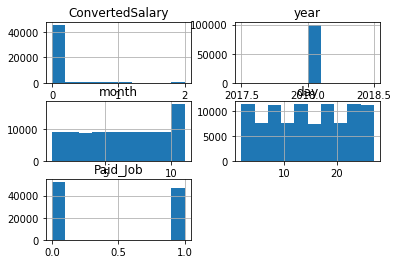

In [13]:
so_number.hist()

<AxesSubplot:>

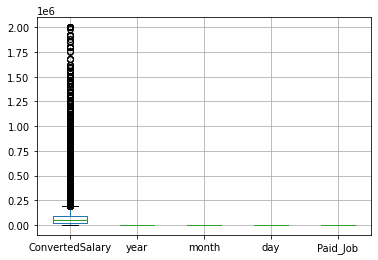

In [14]:
so_number.boxplot()

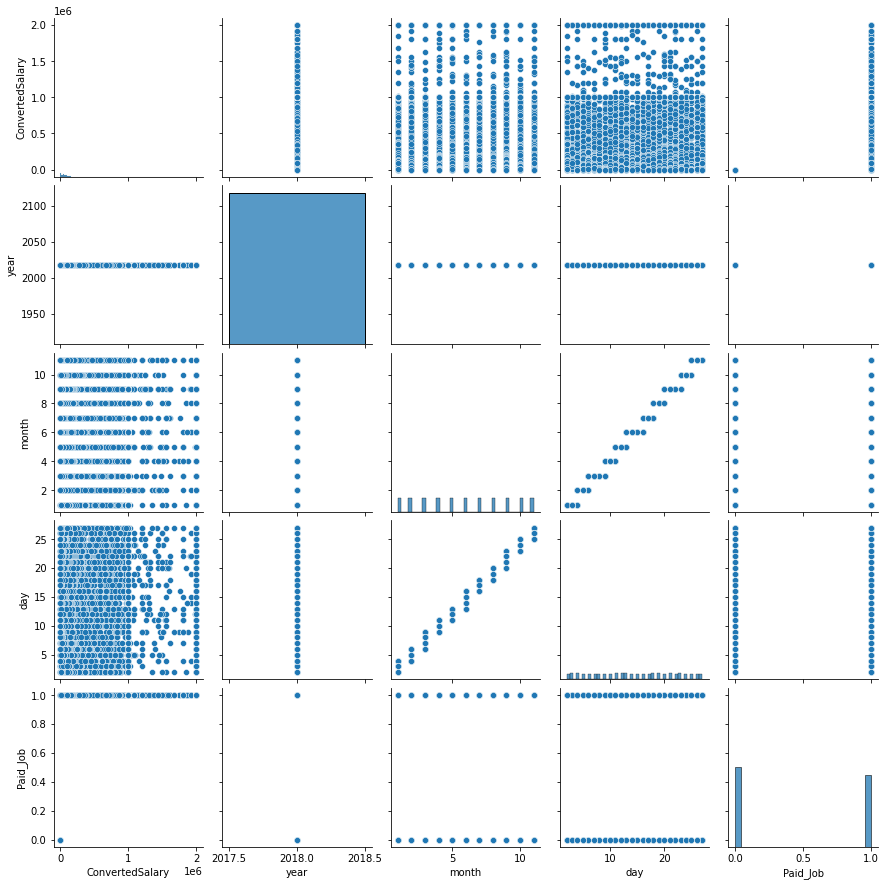

In [15]:
sns.pairplot(so_number)

### Removing Outliner  
- 95% quantile  
- mean +/- 3 std  

In [16]:
so_number.shape

(98855, 5)

In [17]:
salary_95q = so_number['ConvertedSalary'].quantile(0.95)
so_number[so_number['ConvertedSalary'] < salary_95q].shape

(45310, 5)

<AxesSubplot:>

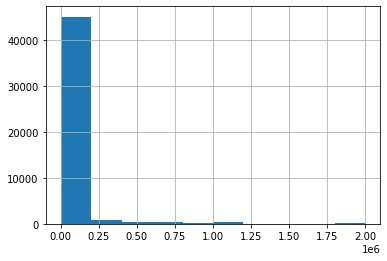

In [18]:
so_number['ConvertedSalary'].hist()

<AxesSubplot:>

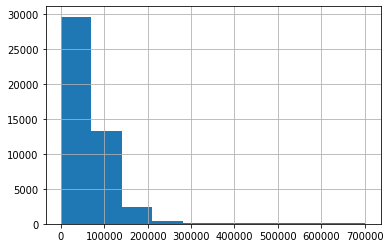

In [19]:

salary_mean = so_number['ConvertedSalary'].mean()
salary_std = so_number['ConvertedSalary'].std()
lower, upper = salary_mean + -3*salary_std, salary_mean + 3*salary_std
so_number[(so_number['ConvertedSalary'] > lower) & (so_number['ConvertedSalary'] < upper)]['ConvertedSalary'].hist()

In [20]:
-3*salary_std, 3*salary_std

(-607044.646875862, 607044.646875862)

# Text Manipulation

In [82]:
speech = pd.read_csv('../input/presidentialaddress/inaug_speeches.csv', encoding='latin', index_col=0)

In [95]:
text = \
(speech
 .assign(text_clean = lambda x : x['text'].str.replace('[^a-zA-A]', ' ', regex=True).str.lower())
 .assign(chr_cnt = lambda x : x['text_clean'].str.len())
 .assign(wrd_cnt = lambda x : x['text_clean'].str.split().str.len())
).reset_index(drop=False)

In [94]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer()
cv.fit_transform(text['text_clean']).shape

(58, 9643)

In [42]:
cv = CountVectorizer(min_df = 0.2, max_df =0.8)
cv.fit_transform(text['text_clean']).shape

(58, 843)

In [96]:
cv_df = pd.DataFrame(data = cv.fit_transform(text['text_clean']).toarray(),
                     columns = cv.get_feature_names()).add_prefix('count_')

# np.concatenate, do bind colomn without row index error
text_cv = pd.concat([text, cv_df], axis=1, sort=False)

In [99]:
from sklearn.feature_extraction.text import TfidfVectorizer
tv = TfidfVectorizer(max_features=100, stop_words='english')
tv_df = pd.DataFrame(data = tv.fit_transform(text['text_clean']).toarray(),
                     columns= tv.get_feature_names()).add_prefix('tfidf_')

In [103]:
tv_df.iloc[0].sort_values(ascending=False).head()

tfidf_public        0.365748
tfidf_present       0.345931
tfidf_government    0.329454
tfidf_duty          0.261918
tfidf_country       0.252048
Name: 0, dtype: float64

### Bag of word / N-gram

In [107]:
from sklearn.feature_extraction.text import CountVectorizer

cv_trigram = CountVectorizer(max_df=100, stop_words='english', ngram_range=(3,3))

cv_trigram.fit(text['text_clean'])
cv_trigram.get_feature_names()

cv_tri_df = pd.DataFrame(data = cv_trigram.fit_transform(text['text_clean']).toarray(),
                         columns= cv_trigram.get_feature_names()).add_prefix('ngram_')

In [109]:
cv_tri_df.sum().sort_values(ascending=False)

ngram_onstitution nited tates         19
ngram_people nited tates              13
ngram_preserve protect defend         10
ngram_resident nited tates             8
ngram_defend onstitution nited         7
                                      ..
ngram_followed ur country              1
ngram_following course blazed          1
ngram_following increased virility     1
ngram_following limited particular     1
ngram_zone extending degrees           1
Length: 58031, dtype: int64